In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_acc_refac

device = get_device()
dataset = 'davis'
total_time = 250
batch_size = 64
folder_name = 'FromLoihi_ABCXO'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  #sensor_size_to = 45,
                  #sensor_size_to = 32,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[ToFrame(sensor_size=(32, 32, 2), time_window=None, event_count=None, n_time_bins=250, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 250
dataset_dict

{'num_input': 2048,
 'num_training_samples': 3000,
 'num_output': 5,
 'dataset_name': 'davis',
 'time_ms': 250}

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=24, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=24, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [15/46], Loss: 0.15571
Step [30/46], Loss: 0.14498
Step [45/46], Loss: 0.13554
Time elasped: 86.24421763420105
590
Test Loss: 0.13483133018016816
Avg spk_count per neuron for all 250 time-steps 786.7415254237288
Test Accuracy of the model on the test samples: 65.593

saving max acc: 65.59322033898304
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24_15Hz_Loihi
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.12485
Step [30/46], Loss: 0.11398
Step [45/46], Loss: 0.11003
Time elasped: 45.819196462631226
590
Test Loss: 0.11545195356011391
Avg spk_count per neuron for all 250 time-steps 856.2237288135593
Test Accuracy of the model on the test samples: 83.051

saving max acc: 83.05084745762711
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24_15Hz_Loihi
Epoch [3/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.10450
Step [30/46], Loss: 0.10482
Step [4

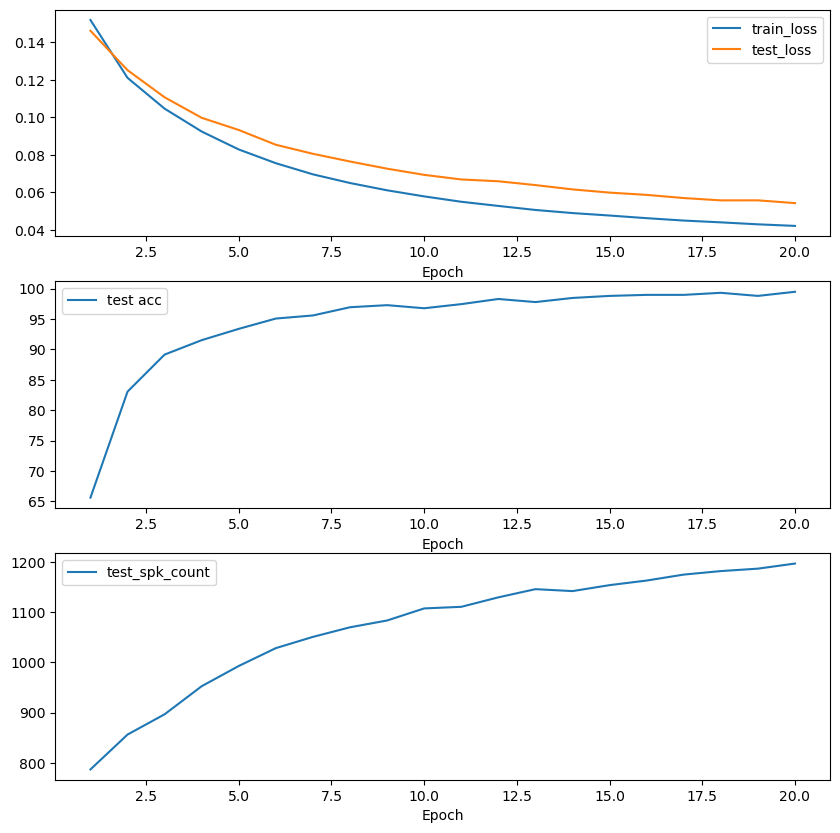

In [3]:
ckpt_dir = 'abcxo_32_24_15Hz_Loihi'

#structure = (64, 2, 'f')
structure = (24, 2, 'f')

extra_kwargs = {}

#tau_m = 50 # initial experiments
tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

#snn.input2spike_th = 0.5

snn.model_name = 'abcxo_f'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=24, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=24, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.16286
Step [30/46], Loss: 0.15119
Step [45/46], Loss: 0.14525
Time elasped: 79.59209156036377
590
Test Loss: 0.1398254558444023
Avg spk_count per neuron for all 250 time-steps 726.9635593220339
Test Accuracy of the model on the test samples: 56.102

saving max acc: 56.101694915254235
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24_15Hz_Loihi
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.13473
Step [30/46], Loss: 0.12482
Step [4

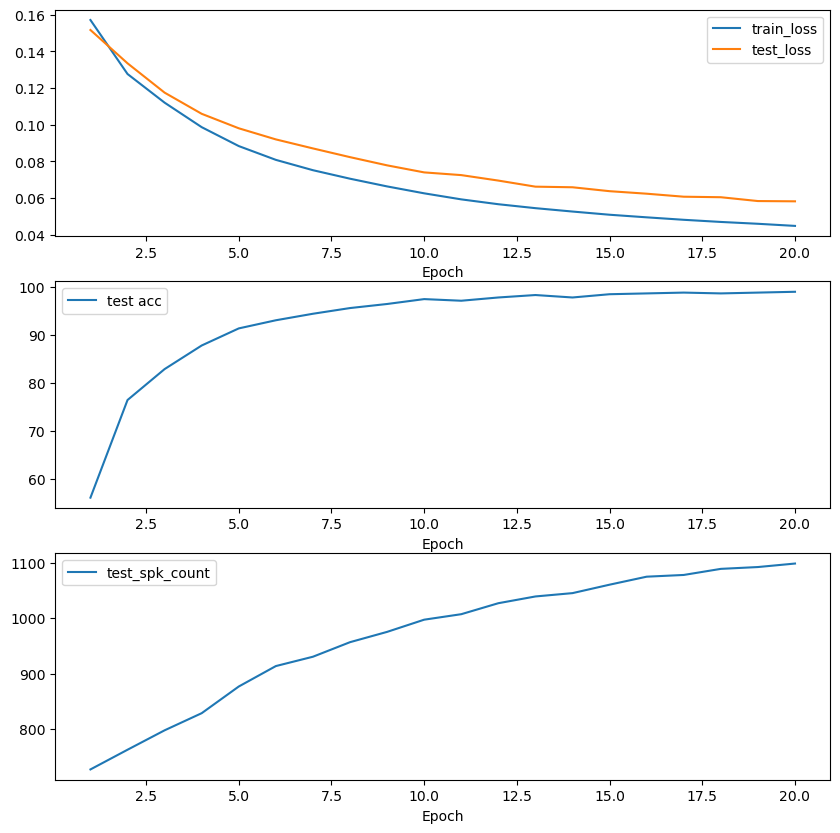

In [4]:
#structure = (64, 2, 'f')
structure = (24, 2, 'f')

extra_kwargs = {}

#tau_m = 50 # initial experiments
tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

snn.input2spike_th = 0.5

snn.model_name = 'abcxo_f_binary'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=640, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [15/46], Loss: 3.20625
Step [30/46], Loss: 1.38389
Step [45/46], Loss: 0.79592
Time elasped: 46.01733756065369
600
Test Loss: 0.8306890785694122
Avg spk_count per neuron for all 250 time-steps 674.7925
Test Accuracy of the model on the test samples: 68.500

saving max acc: 68.5
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24_1ms_15Hz
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.59126
Step [30/46], Loss: 0.37288
Step [45/46], Loss: 0.21907
Time elasped: 45.94100999832153
600
Test Loss: 0.2905832901597023
Avg spk_count per neuron for all 250 time-steps 719.6508333333334
Test Accuracy of the model on the test samples: 89.167

saving max acc: 89.16666666666667
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24_1ms_15Hz
Epoch [3/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.16493
Step [30/46], Loss: 0.12569
Step [45/46], Loss: 0.08252
Time ela

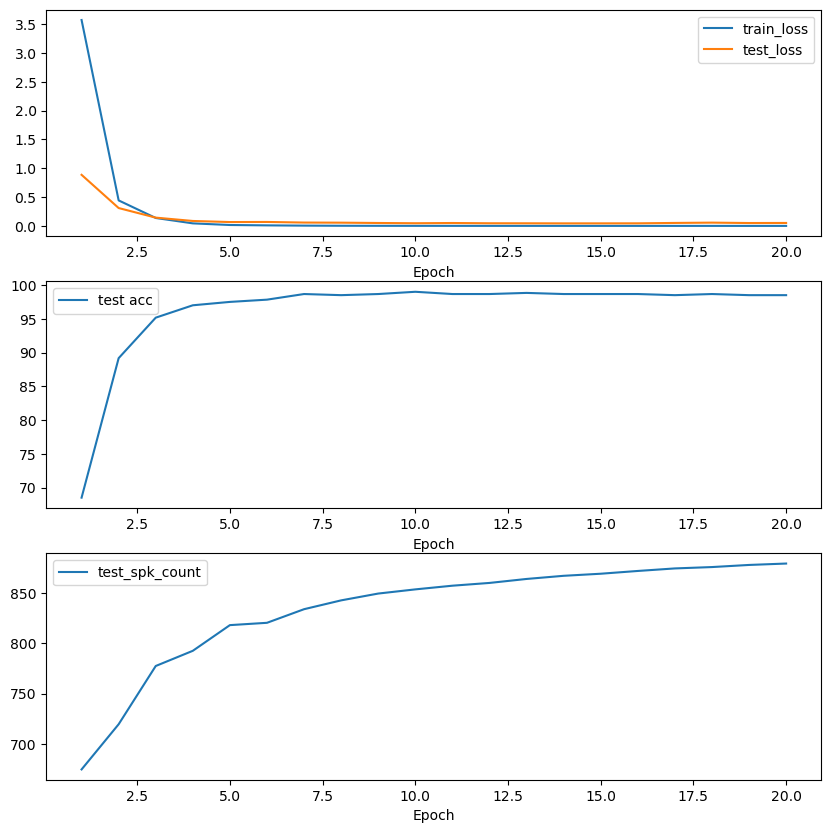

In [6]:
extra_kwargs = {'delay_range':(10, 1),
                'pruned_delays': 10}

snn_rd = SNN(dataset_dict, structure=(64, 2, 'd'), win=total_time, tau_m=1.0,
               loss_fn='mem_sum', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.model_name = 'abcxo_d10'

snn_rd.set_layers()
snn_rd.to(device)

print(snn_rd)
train(snn_rd, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=640, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 2.19581
Step [30/46], Loss: 1.17337
Step [45/46], Loss: 0.94120
Time elasped: 51.572619676589966
600
Test Loss: 0.8719829022884369
Avg spk_count per neuron for all 250 time-steps 543.5533333333333
Test Accuracy of the model on the test samples: 64.500

saving max acc: 64.5
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24_1ms_15Hz
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.62237
Step [30

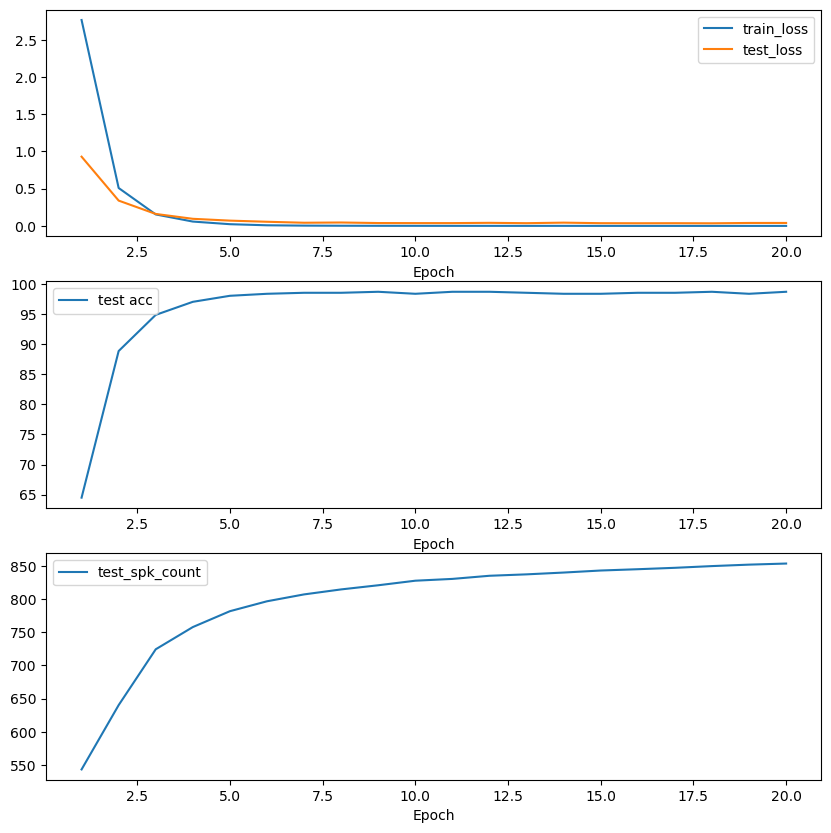

In [7]:
extra_kwargs = {'delay_range':(10, 1),
                'pruned_delays': 10}

snn_rd = SNN(dataset_dict, structure=(64, 2, 'd'), win=total_time, tau_m=1.0,
               loss_fn='mem_sum', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn.input2spike_th = 0.5
snn_rd.model_name = 'abcxo_d10_binary'
snn_rd.set_layers()
snn_rd.to(device)

print(snn_rd)
train(snn_rd, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)